In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [77]:
data = pd.read_csv("../Dataset/data.csv")
data.head()

Text  Label
0  kalo gila jangan keterlaluan apa      1
1     gila banget sih lu jadi orang      1
2               ente ente yang gila      1
3                       budek lu ya      1
4                  jangan gitu nyet      1

In [78]:
stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

In [79]:
data['Text'].astype(str)[1]

'gila banget sih lu jadi orang'

In [80]:
stop = stopword.remove(data['Text'].astype(str)[0])
print(stop)

kalo gila


In [81]:
text = []

for i in range(0, data.shape[0]):
    temp = re.sub(r'[^\w\s]','', data["Text"].astype(str)[i])
    temp = stemmer.stem(temp)
    temp = stopword.remove(temp)
    
    text.append(temp)

In [82]:
text_df = pd.DataFrame(data=text, columns=["Text"])
final_df = pd.concat([text_df, data["Label"]], axis=1)

In [83]:
final_df.head()
final_df.to_csv("../Dataset/clean-data.csv", index=False)

In [84]:
data = final_df.copy()

In [89]:
def word_cloud(data, label, title):
    a = ' '.join(list(data[data['Label'] == label]['Text']))
    b = WordCloud(width = 512, height = 512, background_color="white").generate(a)
    plt.figure(figsize = (5, 5))
    plt.imshow(b)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

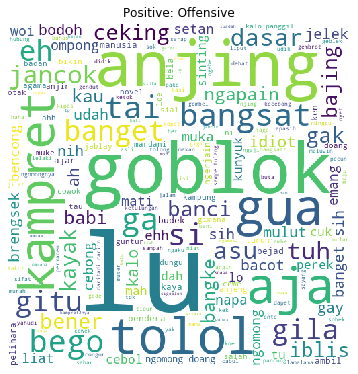

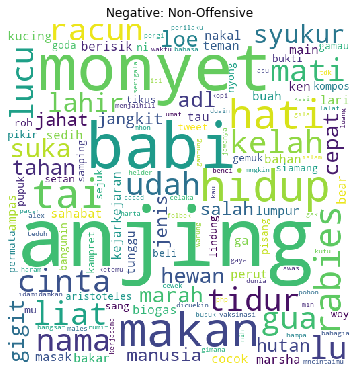

In [90]:
word_cloud(data, 1, 'Positive: Offensive')
word_cloud(data, 0, 'Negative: Non-Offensive')